SURF+Kmeans

In [1]:
import gc, argparse, sys, os, errno
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import os
from tqdm import tqdm_notebook as tqdm
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')
import cv2

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ..

/home/chenxupeng/projects/arts_collection


In [3]:
categories = os.listdir('data/category/')

In [4]:
imgs = []
for cate in categories:
    for tmpimg in os.listdir('data/category/'+cate):
        imgs.append(cate+'/'+tmpimg)

In [5]:
imgs

['jades/175.jpg',
 'jades/324.jpg',
 'jades/2.jpg',
 'jades/300.jpg',
 'jades/364.jpg',
 'jades/76.jpg',
 'jades/243.jpg',
 'jades/111.jpg',
 'jades/477.jpg',
 'jades/170.jpg',
 'jades/437.jpg',
 'jades/270.jpg',
 'jades/150.jpg',
 'jades/365.jpg',
 'jades/11.jpg',
 'jades/185.jpg',
 'jades/156.jpg',
 'jades/367.jpg',
 'jades/303.jpg',
 'jades/88.jpg',
 'jades/74.jpg',
 'jades/20.jpg',
 'jades/363.jpg',
 'jades/126.jpg',
 'jades/59.jpg',
 'jades/469.jpg',
 'jades/225.jpg',
 'jades/12.jpg',
 'jades/21.jpg',
 'jades/454.jpg',
 'jades/242.jpg',
 'jades/335.jpg',
 'jades/407.jpg',
 'jades/129.jpg',
 'jades/372.jpg',
 'jades/218.jpg',
 'jades/487.jpg',
 'jades/476.jpg',
 'jades/231.jpg',
 'jades/161.jpg',
 'jades/136.jpg',
 'jades/203.jpg',
 'jades/28.jpg',
 'jades/291.jpg',
 'jades/248.jpg',
 'jades/22.jpg',
 'jades/287.jpg',
 'jades/362.jpg',
 'jades/283.jpg',
 'jades/447.jpg',
 'jades/164.jpg',
 'jades/83.jpg',
 'jades/219.jpg',
 'jades/154.jpg',
 'jades/271.jpg',
 'jades/441.jpg',
 'jad

In [6]:
img = cv2.imread('data/category/'+imgs[0])

# Here I set Hessian Threshold to 2000
# Find keypoints and descriptors directly  数量不等的关键点和64维描述子？

In [8]:
SIFT = cv2.xfeatures2d_SIFT.create()
SURF = cv2.xfeatures2d_SURF.create()

hessian_threshold = 2000
detector = cv2.xfeatures2d_SURF(hessian_threshold)

# 提取特征并计算描述子
#kps, des = cv2.xfeatures2d_SIFT.detectAndCompute(SIFT, img, None)

error: OpenCV(4.1.0) /io/opencv_contrib/modules/xfeatures2d/src/sift.cpp:1207: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'


In [9]:
# build feature detector and descriptor extractor

hkeypoints,hdescriptors = des2 = cv2.xfeatures2d_SURF.detectAndCompute(SURF, img, None)

# extract vectors of size 64 from raw descriptors numpy arrays
rowsize = len(hdescriptors) / len(hkeypoints)
if rowsize > 1:
    hrows = numpy.array(hdescriptors, dtype = numpy.float32).reshape((-1, rowsize))
    #print hrows.shape, nrows.shape
else:
    hrows = numpy.array(hdescriptors, dtype = numpy.float32)
    rowsize = len(hrows[0])

NameError: name 'SURF' is not defined

In [10]:
len(hkeypoints),hdescriptors.shape

NameError: name 'hkeypoints' is not defined

In [11]:
# kNN training - learn mapping from hrow to hkeypoints index
samples = hrows
responses = numpy.arange(len(hkeypoints), dtype = numpy.float32)
#print len(samples), len(responses)
knn = cv2.ml.KNearest_create()
knn.train(samples,cv2.ml.ROW_SAMPLE,responses)

# retrieve index and value through enumeration
for i, descriptor in enumerate(hrows):
    descriptor = numpy.array(descriptor, dtype = numpy.float32).reshape((1, rowsize))
    #print i, descriptor.shape, samples[0].shape
    retval, results, neigh_resp, dists = knn.findNearest(descriptor, 1)
    res, dist =  int(results[0][0]), dists[0][0]
    #print res, dist

    if dist < 0.1:
        # draw matched keypoints in red color
        color = (0, 0, 255)
    else:
        # draw unmatched in blue color
        color = (255, 0, 0)
    # draw matched key points on haystack image
    x,y = hkeypoints[res].pt
    center = (int(x),int(y))
    cv2.circle(img,center,2,color,-1)



NameError: name 'hrows' is not defined

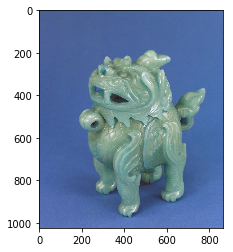

In [12]:
imshow(img)